In [1]:
import pandas as pd
import numpy as np
import statsmodels.formula.api as sm
import scipy.stats as stats ## new library alert! ##
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
df = pd.read_csv('DC_properties.csv')

C:\Users\tegen\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (18,19,20,21,22,23,24,33,34,35,37,43,45) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [2]:
df.head()

,Unnamed: 0,BATHRM,HF_BATHRM,HEAT,AC,NUM_UNITS,ROOMS,BEDRM,AYB,YR_RMDL,...,LONGITUDE,ASSESSMENT_NBHD,ASSESSMENT_SUBNBHD,CENSUS_TRACT,CENSUS_BLOCK,WARD,SQUARE,X,Y,QUADRANT
0,0,4,0,Warm Cool,Y,2.0,8,4,1910.0,1988.0,...,-77.040832,Old City 2,040 D Old City 2,4201.0,004201 2006,Ward 2,152,-77.040429,38.914881,NW
1,1,3,1,Warm Cool,Y,2.0,11,5,1898.0,2007.0,...,-77.040764,Old City 2,040 D Old City 2,4201.0,004201 2006,Ward 2,152,-77.040429,38.914881,NW
2,2,3,1,Hot Water Rad,Y,2.0,9,5,1910.0,2009.0,...,-77.040678,Old City 2,040 D Old City 2,4201.0,004201 2006,Ward 2,152,-77.040429,38.914881,NW
3,3,3,1,Hot Water Rad,Y,2.0,8,5,1900.0,2003.0,...,-77.040629,Old City 2,040 D Old City 2,4201.0,004201 2006,Ward 2,152,-77.040429,38.914881,NW
4,4,2,1,Warm Cool,Y,1.0,11,3,1913.0,2012.0,...,-77.039361,Old City 2,040 D Old City 2,4201.0,004201 2006,Ward 2,152,-77.040429,38.914881,NW


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158957 entries, 0 to 158956
Data columns (total 49 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Unnamed: 0          158957 non-null  int64  
 1   BATHRM              158957 non-null  int64  
 2   HF_BATHRM           158957 non-null  int64  
 3   HEAT                158957 non-null  object 
 4   AC                  158957 non-null  object 
 5   NUM_UNITS           106696 non-null  float64
 6   ROOMS               158957 non-null  int64  
 7   BEDRM               158957 non-null  int64  
 8   AYB                 158686 non-null  float64
 9   YR_RMDL             80928 non-null   float64
 10  EYB                 158957 non-null  int64  
 11  STORIES             106652 non-null  float64
 12  SALEDATE            132187 non-null  object 
 13  PRICE               98216 non-null   float64
 14  QUALIFIED           158957 non-null  object 
 15  SALE_NUM            158957 non-nul

In [4]:
df.shape

(158957, 49)

In [5]:
df.isnull().sum()

Unnamed: 0                 0
BATHRM                     0
HF_BATHRM                  0
HEAT                       0
AC                         0
NUM_UNITS              52261
ROOMS                      0
BEDRM                      0
AYB                      271
YR_RMDL                78029
EYB                        0
STORIES                52305
SALEDATE               26770
PRICE                  60741
QUALIFIED                  0
SALE_NUM                   0
GBA                    52261
BLDG_NUM                   0
STYLE                  52261
STRUCT                 52261
GRADE                  52261
CNDTN                  52261
EXTWALL                52261
ROOF                   52261
INTWALL                52261
KITCHENS               52262
FIREPLACES                 0
USECODE                    0
LANDAREA                   0
GIS_LAST_MOD_DTTM          0
SOURCE                     0
CMPLX_NUM             106696
LIVING_GBA            106696
FULLADDRESS            52917
CITY          

In [6]:
df.fillna( 0, inplace = True)
df.head()

,Unnamed: 0,BATHRM,HF_BATHRM,HEAT,AC,NUM_UNITS,ROOMS,BEDRM,AYB,YR_RMDL,...,LONGITUDE,ASSESSMENT_NBHD,ASSESSMENT_SUBNBHD,CENSUS_TRACT,CENSUS_BLOCK,WARD,SQUARE,X,Y,QUADRANT
0,0,4,0,Warm Cool,Y,2.0,8,4,1910.0,1988.0,...,-77.040832,Old City 2,040 D Old City 2,4201.0,004201 2006,Ward 2,152,-77.040429,38.914881,NW
1,1,3,1,Warm Cool,Y,2.0,11,5,1898.0,2007.0,...,-77.040764,Old City 2,040 D Old City 2,4201.0,004201 2006,Ward 2,152,-77.040429,38.914881,NW
2,2,3,1,Hot Water Rad,Y,2.0,9,5,1910.0,2009.0,...,-77.040678,Old City 2,040 D Old City 2,4201.0,004201 2006,Ward 2,152,-77.040429,38.914881,NW
3,3,3,1,Hot Water Rad,Y,2.0,8,5,1900.0,2003.0,...,-77.040629,Old City 2,040 D Old City 2,4201.0,004201 2006,Ward 2,152,-77.040429,38.914881,NW
4,4,2,1,Warm Cool,Y,1.0,11,3,1913.0,2012.0,...,-77.039361,Old City 2,040 D Old City 2,4201.0,004201 2006,Ward 2,152,-77.040429,38.914881,NW


In [7]:
pd.set_option('display.max_columns', None) 


In [8]:
df.drop(columns = ['Unnamed: 0', 'SALEDATE', 'SALE_NUM', 'CMPLX_NUM', 'CMPLX_NUM', 'LIVING_GBA', 'X', 'Y'], inplace = True)
df.head()

,BATHRM,HF_BATHRM,HEAT,AC,NUM_UNITS,ROOMS,BEDRM,AYB,YR_RMDL,EYB,STORIES,PRICE,QUALIFIED,GBA,BLDG_NUM,STYLE,STRUCT,GRADE,CNDTN,EXTWALL,ROOF,INTWALL,KITCHENS,FIREPLACES,USECODE,LANDAREA,GIS_LAST_MOD_DTTM,SOURCE,FULLADDRESS,CITY,STATE,ZIPCODE,NATIONALGRID,LATITUDE,LONGITUDE,ASSESSMENT_NBHD,ASSESSMENT_SUBNBHD,CENSUS_TRACT,CENSUS_BLOCK,WARD,SQUARE,QUADRANT
0,4,0,Warm Cool,Y,2.0,8,4,1910.0,1988.0,1972,3.0,1095000.0,Q,2522.0,1,3 Story,Row Inside,Very Good,Good,Common Brick,Metal- Sms,Hardwood,2.0,5,24,1680,2018-07-22 18:01:43,Residential,1748 SWANN STREET NW,WASHINGTON,DC,20009.0,18S UJ 23061 09289,38.914680,-77.040832,Old City 2,040 D Old City 2,4201.0,004201 2006,Ward 2,152,NW
1,3,1,Warm Cool,Y,2.0,11,5,1898.0,2007.0,1972,3.0,0.0,U,2567.0,1,3 Story,Row Inside,Very Good,Good,Common Brick,Built Up,Hardwood,2.0,4,24,1680,2018-07-22 18:01:43,Residential,1746 SWANN STREET NW,WASHINGTON,DC,20009.0,18S UJ 23067 09289,38.914683,-77.040764,Old City 2,040 D Old City 2,4201.0,004201 2006,Ward 2,152,NW
2,3,1,Hot Water Rad,Y,2.0,9,5,1910.0,2009.0,1984,3.0,2100000.0,Q,2522.0,1,3 Story,Row Inside,Very Good,Very Good,Common Brick,Built Up,Hardwood,2.0,4,24,1680,2018-07-22 18:01:43,Residential,1744 SWANN STREET NW,WASHINGTON,DC,20009.0,18S UJ 23074 09289,38.914684,-77.040678,Old City 2,040 D Old City 2,4201.0,004201 2006,Ward 2,152,NW
3,3,1,Hot Water Rad,Y,2.0,8,5,1900.0,2003.0,1984,3.0,1602000.0,Q,2484.0,1,3 Story,Row Inside,Very Good,Good,Common Brick,Built Up,Hardwood,2.0,3,24,1680,2018-07-22 18:01:43,Residential,1742 SWANN STREET NW,WASHINGTON,DC,20009.0,18S UJ 23078 09288,38.914683,-77.040629,Old City 2,040 D Old City 2,4201.0,004201 2006,Ward 2,152,NW
4,2,1,Warm Cool,Y,1.0,11,3,1913.0,2012.0,1985,3.0,0.0,U,5255.0,1,3 Story,Semi-Detached,Very Good,Good,Common Brick,Neopren,Hardwood,1.0,0,13,2032,2018-07-22 18:01:43,Residential,1804 NEW HAMPSHIRE AVENUE NW,WASHINGTON,DC,20009.0,18S UJ 23188 09253,38.914383,-77.039361,Old City 2,040 D Old City 2,4201.0,004201 2006,Ward 2,152,NW


In [9]:
df.dtypes

BATHRM                  int64
HF_BATHRM               int64
HEAT                   object
AC                     object
NUM_UNITS             float64
ROOMS                   int64
BEDRM                   int64
AYB                   float64
YR_RMDL               float64
EYB                     int64
STORIES               float64
PRICE                 float64
QUALIFIED              object
GBA                   float64
BLDG_NUM                int64
STYLE                  object
STRUCT                 object
GRADE                  object
CNDTN                  object
EXTWALL                object
ROOF                   object
INTWALL                object
KITCHENS              float64
FIREPLACES              int64
USECODE                 int64
LANDAREA                int64
GIS_LAST_MOD_DTTM      object
SOURCE                 object
FULLADDRESS            object
CITY                   object
STATE                  object
ZIPCODE               float64
NATIONALGRID           object
LATITUDE  

In [10]:
df.describe()

,BATHRM,HF_BATHRM,NUM_UNITS,ROOMS,BEDRM,AYB,YR_RMDL,EYB,STORIES,PRICE,GBA,BLDG_NUM,KITCHENS,FIREPLACES,USECODE,LANDAREA,ZIPCODE,LATITUDE,LONGITUDE,CENSUS_TRACT
count,158957.000000,158957.000000,158957.000000,158957.000000,158957.000000,158957.000000,158957.000000,158957.000000,158957.000000,1.589570e+05,158957.000000,158957.000000,158957.000000,158957.000000,158957.000000,158957.000000,158957.000000,158957.000000,158957.000000,158957.000000
mean,1.810678,0.458237,0.804155,6.187736,2.732506,1938.676755,1017.343388,1963.718024,1.403486,5.754615e+05,1150.842983,1.000598,0.818385,2.374674,14.252999,2473.282158,20012.568663,38.914609,-77.016192,5348.182678
std,0.976396,0.587571,0.745598,2.618165,1.358864,86.881492,999.028749,24.923150,2.595981,5.568976e+06,1081.354371,0.031622,0.766195,737.295595,3.725736,5059.046023,52.571889,0.102631,0.197463,3369.662055
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1800.000000,0.000000,0.000000e+00,0.000000,1.000000,0.000000,0.000000,11.000000,0.000000,0.000000,0.000000,-77.113909,0.000000
25%,1.000000,0.000000,0.000000,4.000000,2.000000,1918.000000,0.000000,1954.000000,0.000000,0.000000e+00,0.000000,1.000000,0.000000,0.000000,11.000000,697.000000,20007.000000,38.895425,-77.042892,2102.000000
50%,2.000000,0.000000,1.000000,6.000000,3.000000,1937.000000,1963.000000,1963.000000,2.000000,2.000000e+05,1200.000000,1.000000,1.000000,0.000000,13.000000,1649.000000,20011.000000,38.915336,-77.019596,5201.000000
75%,2.000000,1.000000,1.000000,7.000000,3.000000,1960.000000,2004.000000,1975.000000,2.000000,4.790000e+05,1670.000000,1.000000,1.000000,1.000000,17.000000,3000.000000,20018.000000,38.936075,-76.988626,8302.000000
max,14.000000,11.000000,6.000000,48.000000,24.000000,2019.000000,2019.000000,2018.000000,826.000000,1.374275e+08,45384.000000,5.000000,44.000000,293920.000000,117.000000,942632.000000,20392.000000,38.995540,0.000000,11100.000000


In [11]:
df.corr()

,BATHRM,HF_BATHRM,NUM_UNITS,ROOMS,BEDRM,AYB,YR_RMDL,EYB,STORIES,PRICE,GBA,BLDG_NUM,KITCHENS,FIREPLACES,USECODE,LANDAREA,ZIPCODE,LATITUDE,LONGITUDE,CENSUS_TRACT
BATHRM,1.000000e+00,0.248759,0.481502,0.677751,0.655563,-0.014715,0.113797,0.269444,0.157771,-2.942690e-07,0.648537,-0.000207,0.493796,-0.001632,0.121070,0.287648,-0.019313,0.039901,-0.037839,-0.196311
HF_BATHRM,2.487590e-01,1.000000,0.188640,0.353825,0.375568,-0.006212,-0.004959,0.235645,0.163664,-1.248369e-02,0.426696,-0.009322,0.195467,-0.001635,-0.229586,0.212534,-0.004126,0.040874,-0.014087,-0.072880
NUM_UNITS,4.815016e-01,0.188640,1.000000,0.739343,0.648683,-0.126296,-0.071555,0.083046,0.297332,-4.934621e-02,0.677776,0.016705,0.969703,-0.002585,0.133453,0.176700,-0.024499,-0.005915,0.044703,0.100163
ROOMS,6.777506e-01,0.353825,0.739343,1.000000,0.841309,-0.096387,-0.045177,0.158847,0.272704,-4.067945e-02,0.811391,-0.003255,0.738228,-0.003660,-0.042795,0.348184,-0.020188,0.032780,0.005911,-0.075610
BEDRM,6.555632e-01,0.375568,0.648683,0.841309,1.000000,-0.103270,-0.037401,0.168913,0.278027,-4.440439e-02,0.777845,-0.006528,0.652780,-0.004696,-0.131676,0.321066,-0.023625,0.042584,0.008164,-0.072037
AYB,-1.471518e-02,-0.006212,-0.126296,-0.096387,-0.103270,1.000000,-0.108143,0.269521,-0.059161,2.417407e-02,-0.112352,0.002775,-0.127677,0.000663,0.040696,-0.029316,0.019759,-0.017336,0.000108,0.035618
YR_RMDL,1.137973e-01,-0.004959,-0.071555,-0.045177,-0.037401,-0.108143,1.000000,-0.221593,-0.036630,5.765238e-02,-0.022855,-0.010481,-0.059554,0.002591,0.120593,-0.029151,-0.025564,0.009974,-0.032310,-0.126844
EYB,2.694444e-01,0.235645,0.083046,0.158847,0.168913,0.269521,-0.221593,1.000000,0.073526,5.136615e-02,0.217830,0.014750,0.089057,0.000097,-0.059968,0.081796,0.013299,-0.024483,0.000102,0.036707
STORIES,1.577708e-01,0.163664,0.297332,0.272704,0.278027,-0.059161,-0.036630,0.073526,1.000000,-2.229122e-02,0.316243,0.001354,0.295799,-0.001255,-0.146029,0.092178,-0.009961,0.008138,0.013517,0.013443
PRICE,-2.942690e-07,-0.012484,-0.049346,-0.040679,-0.044404,0.024174,0.057652,0.051366,-0.022291,1.000000e+00,-0.031210,-0.000586,-0.046897,0.024071,0.030447,-0.010282,-0.000164,0.009552,-0.016024,-0.055114


In [12]:
df['PRICE'].max()

137427545.0

In [13]:
df['PRICE'].mean()

575461.465981366

In [14]:
df['BEDRM'].max()

24

In [15]:
df['BEDRM'].min()

0

In [16]:
df['BATHRM'].max()

14

In [17]:
df['BATHRM'].min()

0

In [18]:
df['ROOMS'].max()

48

In [19]:
df['ROOMS'].min()

0

In [20]:
df['zscore_STORIES'] = np.abs(stats.zscore(df['STORIES']))
df.head()

,BATHRM,HF_BATHRM,HEAT,AC,NUM_UNITS,ROOMS,BEDRM,AYB,YR_RMDL,EYB,STORIES,PRICE,QUALIFIED,GBA,BLDG_NUM,STYLE,STRUCT,GRADE,CNDTN,EXTWALL,ROOF,INTWALL,KITCHENS,FIREPLACES,USECODE,LANDAREA,GIS_LAST_MOD_DTTM,SOURCE,FULLADDRESS,CITY,STATE,ZIPCODE,NATIONALGRID,LATITUDE,LONGITUDE,ASSESSMENT_NBHD,ASSESSMENT_SUBNBHD,CENSUS_TRACT,CENSUS_BLOCK,WARD,SQUARE,QUADRANT,zscore_STORIES
0,4,0,Warm Cool,Y,2.0,8,4,1910.0,1988.0,1972,3.0,1095000.0,Q,2522.0,1,3 Story,Row Inside,Very Good,Good,Common Brick,Metal- Sms,Hardwood,2.0,5,24,1680,2018-07-22 18:01:43,Residential,1748 SWANN STREET NW,WASHINGTON,DC,20009.0,18S UJ 23061 09289,38.914680,-77.040832,Old City 2,040 D Old City 2,4201.0,004201 2006,Ward 2,152,NW,0.614996
1,3,1,Warm Cool,Y,2.0,11,5,1898.0,2007.0,1972,3.0,0.0,U,2567.0,1,3 Story,Row Inside,Very Good,Good,Common Brick,Built Up,Hardwood,2.0,4,24,1680,2018-07-22 18:01:43,Residential,1746 SWANN STREET NW,WASHINGTON,DC,20009.0,18S UJ 23067 09289,38.914683,-77.040764,Old City 2,040 D Old City 2,4201.0,004201 2006,Ward 2,152,NW,0.614996
2,3,1,Hot Water Rad,Y,2.0,9,5,1910.0,2009.0,1984,3.0,2100000.0,Q,2522.0,1,3 Story,Row Inside,Very Good,Very Good,Common Brick,Built Up,Hardwood,2.0,4,24,1680,2018-07-22 18:01:43,Residential,1744 SWANN STREET NW,WASHINGTON,DC,20009.0,18S UJ 23074 09289,38.914684,-77.040678,Old City 2,040 D Old City 2,4201.0,004201 2006,Ward 2,152,NW,0.614996
3,3,1,Hot Water Rad,Y,2.0,8,5,1900.0,2003.0,1984,3.0,1602000.0,Q,2484.0,1,3 Story,Row Inside,Very Good,Good,Common Brick,Built Up,Hardwood,2.0,3,24,1680,2018-07-22 18:01:43,Residential,1742 SWANN STREET NW,WASHINGTON,DC,20009.0,18S UJ 23078 09288,38.914683,-77.040629,Old City 2,040 D Old City 2,4201.0,004201 2006,Ward 2,152,NW,0.614996
4,2,1,Warm Cool,Y,1.0,11,3,1913.0,2012.0,1985,3.0,0.0,U,5255.0,1,3 Story,Semi-Detached,Very Good,Good,Common Brick,Neopren,Hardwood,1.0,0,13,2032,2018-07-22 18:01:43,Residential,1804 NEW HAMPSHIRE AVENUE NW,WASHINGTON,DC,20009.0,18S UJ 23188 09253,38.914383,-77.039361,Old City 2,040 D Old City 2,4201.0,004201 2006,Ward 2,152,NW,0.614996


In [21]:
z_outliers = df.loc[df['zscore_STORIES'] > 3].index
print(z_outliers)

Int64Index([ 3737,  7546, 20491, 21170, 21930, 32184, 44488, 79841, 79853,
            85656, 88110, 94741],
           dtype='int64')


In [22]:
df.iloc[[3737, 7546, 20491, 21170, 21930, 32184, 44488, 79841, 79853,
            85656, 88110, 94741]]

,BATHRM,HF_BATHRM,HEAT,AC,NUM_UNITS,ROOMS,BEDRM,AYB,YR_RMDL,EYB,STORIES,PRICE,QUALIFIED,GBA,BLDG_NUM,STYLE,STRUCT,GRADE,CNDTN,EXTWALL,ROOF,INTWALL,KITCHENS,FIREPLACES,USECODE,LANDAREA,GIS_LAST_MOD_DTTM,SOURCE,FULLADDRESS,CITY,STATE,ZIPCODE,NATIONALGRID,LATITUDE,LONGITUDE,ASSESSMENT_NBHD,ASSESSMENT_SUBNBHD,CENSUS_TRACT,CENSUS_BLOCK,WARD,SQUARE,QUADRANT,zscore_STORIES
3737,2,1,Forced Air,Y,2.0,7,3,1895.0,1968.0,1960,65.0,0.0,U,1392.0,1,2 Story,Semi-Detached,Good Quality,Good,Common Brick,Built Up,Wood Floor,2.0,2,24,1480,2018-07-22 18:01:43,Residential,321 2ND STREET SE,WASHINGTON,DC,20003.0,18S UJ 26210 05969,38.885411,-77.003689,Capitol Hill,009 A Capitol Hill,6500.0,006500 1010,Ward 6,733,SE,24.498144
7546,1,2,Hot Water Rad,N,1.0,6,3,1920.0,2001.0,1969,826.0,760000.0,Q,1442.0,1,4 Story,Row Inside,Good Quality,Good,Common Brick,Metal- Sms,Wood Floor,1.0,0,11,966,2018-07-22 18:01:43,Residential,664 E STREET NE,WASHINGTON,DC,20002.0,18S UJ 26868 07163,38.896299,-76.996409,Old City 1,039 K Old City 1,8302.0,008302 1009,Ward 6,861,NE,317.644519
20491,2,1,Warm Cool,Y,1.0,7,3,1900.0,2008.0,1992,250.0,1459000.0,Q,1425.0,1,2.5 Story Fin,Row Inside,Superior,Very Good,Common Brick,Comp Shingle,Hardwood,1.0,1,11,810,2018-07-22 18:01:43,Residential,2712 N STREET NW,WASHINGTON,DC,20007.0,18S UJ 21710 08438,38.906746,-77.056187,Georgetown,025 J Georgetown,100.0,000100 2006,Ward 2,1215,NW,95.762374
21170,4,2,Warm Cool,Y,1.0,10,4,1900.0,2004.0,2000,275.0,5397500.0,U,3582.0,1,2.5 Story Fin,Row Inside,Exceptional-B,Very Good,Common Brick,Slate,Hardwood,2.0,4,12,5859,2018-07-22 18:01:43,Residential,2912 N STREET NW,WASHINGTON,DC,20007.0,18S UJ 21487 08439,38.906711,-77.058753,Georgetown,025 J Georgetown,100.0,000100 4006,Ward 2,1211,NW,105.392676
21930,2,1,Warm Cool,Y,1.0,7,3,1900.0,2006.0,1992,275.0,1725000.0,Q,1584.0,1,3 Story,Row Inside,Superior,Very Good,Common Brick,Metal- Sms,Hardwood,1.0,2,11,982,2018-07-22 18:01:43,Residential,2721 O STREET NW,WASHINGTON,DC,20007.0,18S UJ 21688 08652,38.908668,-77.056496,Georgetown,025 J Georgetown,100.0,000100 2002,Ward 2,1260,NW,105.392676
32184,4,1,Warm Cool,Y,1.0,11,5,1939.0,1975.0,1960,25.0,1350000.0,Q,2616.0,1,2.5 Story Fin,Single,Good Quality,Average,Common Brick,Slate,Hardwood,1.0,1,12,7398,2018-07-22 18:01:43,Residential,3665 UPTON STREET NW,WASHINGTON,DC,20008.0,18S UJ 20495 12427,38.942418,-77.071230,North Cleveland Park,0,1200.0,001200 4012,Ward 3,1897,NW,9.089662
44488,2,1,Forced Air,N,1.0,7,3,1936.0,1987.0,1969,25.0,820000.0,Q,2330.0,1,2 Story,Single,Good Quality,Good,Common Brick,Slate,Hardwood,1.0,1,12,8070,2018-07-22 18:01:43,Residential,7913 ORCHID STREET NW,WASHINGTON,DC,20012.0,18S UJ 23447 17389,38.987708,-77.038465,Colonial Village,0,1600.0,001600 4022,Ward 4,2747,NW,9.089662
79841,3,1,Forced Air,Y,1.0,7,3,2017.0,0.0,2017,25.0,698790.0,Q,2160.0,1,2.5 Story Fin,Row End,Good Quality,Excellent,Common Brick,Comp Shingle,Hardwood,1.0,0,11,2403,2018-07-22 18:01:43,Residential,3710 COMMODORE JOSHUA BARNEY DRIVE NE,WASHINGTON,DC,20018.0,18S UJ 30737 10173,38.924121,-76.952687,Fort Lincoln,0,9000.0,009000 1001,Ward 5,4327,NE,9.089662
79853,3,1,Forced Air,Y,1.0,7,3,2017.0,0.0,2017,25.0,699000.0,Q,2160.0,1,2.5 Story Fin,Row End,Good Quality,Excellent,Common Brick,Comp Shingle,Hardwood,1.0,0,11,2508,2018-07-22 18:01:43,Residential,3643 JAMISON STREET NE,WASHINGTON,DC,20018.0,18S UJ 30684 10201,38.924399,-76.953175,Fort Lincoln,0,9000.0,009000 1001,Ward 5,4327,NE,9.089662
85656,2,0,Forced Air,Y,1.0,6,3,1946.0,2016.0,1966,20.0,314500.0,Q,990.0,1,2 Story,Row Inside,Average,Good,Common Brick,Built Up,Hardwood,1.0,0,11,1200,2018-07-22 18:01:43,Residential,4205 HAYES STREET NE,WASHINGTON,DC,20019.0,18S UJ 31567 07420,38.899522,-76.942310,Deanwood,018 A Deanwood,7803.0,007803 1006,Ward 7,5093,NE,7.163601


In [23]:
df.head()

,BATHRM,HF_BATHRM,HEAT,AC,NUM_UNITS,ROOMS,BEDRM,AYB,YR_RMDL,EYB,STORIES,PRICE,QUALIFIED,GBA,BLDG_NUM,STYLE,STRUCT,GRADE,CNDTN,EXTWALL,ROOF,INTWALL,KITCHENS,FIREPLACES,USECODE,LANDAREA,GIS_LAST_MOD_DTTM,SOURCE,FULLADDRESS,CITY,STATE,ZIPCODE,NATIONALGRID,LATITUDE,LONGITUDE,ASSESSMENT_NBHD,ASSESSMENT_SUBNBHD,CENSUS_TRACT,CENSUS_BLOCK,WARD,SQUARE,QUADRANT,zscore_STORIES
0,4,0,Warm Cool,Y,2.0,8,4,1910.0,1988.0,1972,3.0,1095000.0,Q,2522.0,1,3 Story,Row Inside,Very Good,Good,Common Brick,Metal- Sms,Hardwood,2.0,5,24,1680,2018-07-22 18:01:43,Residential,1748 SWANN STREET NW,WASHINGTON,DC,20009.0,18S UJ 23061 09289,38.914680,-77.040832,Old City 2,040 D Old City 2,4201.0,004201 2006,Ward 2,152,NW,0.614996
1,3,1,Warm Cool,Y,2.0,11,5,1898.0,2007.0,1972,3.0,0.0,U,2567.0,1,3 Story,Row Inside,Very Good,Good,Common Brick,Built Up,Hardwood,2.0,4,24,1680,2018-07-22 18:01:43,Residential,1746 SWANN STREET NW,WASHINGTON,DC,20009.0,18S UJ 23067 09289,38.914683,-77.040764,Old City 2,040 D Old City 2,4201.0,004201 2006,Ward 2,152,NW,0.614996
2,3,1,Hot Water Rad,Y,2.0,9,5,1910.0,2009.0,1984,3.0,2100000.0,Q,2522.0,1,3 Story,Row Inside,Very Good,Very Good,Common Brick,Built Up,Hardwood,2.0,4,24,1680,2018-07-22 18:01:43,Residential,1744 SWANN STREET NW,WASHINGTON,DC,20009.0,18S UJ 23074 09289,38.914684,-77.040678,Old City 2,040 D Old City 2,4201.0,004201 2006,Ward 2,152,NW,0.614996
3,3,1,Hot Water Rad,Y,2.0,8,5,1900.0,2003.0,1984,3.0,1602000.0,Q,2484.0,1,3 Story,Row Inside,Very Good,Good,Common Brick,Built Up,Hardwood,2.0,3,24,1680,2018-07-22 18:01:43,Residential,1742 SWANN STREET NW,WASHINGTON,DC,20009.0,18S UJ 23078 09288,38.914683,-77.040629,Old City 2,040 D Old City 2,4201.0,004201 2006,Ward 2,152,NW,0.614996
4,2,1,Warm Cool,Y,1.0,11,3,1913.0,2012.0,1985,3.0,0.0,U,5255.0,1,3 Story,Semi-Detached,Very Good,Good,Common Brick,Neopren,Hardwood,1.0,0,13,2032,2018-07-22 18:01:43,Residential,1804 NEW HAMPSHIRE AVENUE NW,WASHINGTON,DC,20009.0,18S UJ 23188 09253,38.914383,-77.039361,Old City 2,040 D Old City 2,4201.0,004201 2006,Ward 2,152,NW,0.614996


In [24]:
df = df.drop(z_outliers)

In [25]:
print(df.shape)

(158945, 43)


In [26]:
df['zscore_PRICE'] = np.abs(stats.zscore(df['PRICE']))
df.head()

,BATHRM,HF_BATHRM,HEAT,AC,NUM_UNITS,ROOMS,BEDRM,AYB,YR_RMDL,EYB,STORIES,PRICE,QUALIFIED,GBA,BLDG_NUM,STYLE,STRUCT,GRADE,CNDTN,EXTWALL,ROOF,INTWALL,KITCHENS,FIREPLACES,USECODE,LANDAREA,GIS_LAST_MOD_DTTM,SOURCE,FULLADDRESS,CITY,STATE,ZIPCODE,NATIONALGRID,LATITUDE,LONGITUDE,ASSESSMENT_NBHD,ASSESSMENT_SUBNBHD,CENSUS_TRACT,CENSUS_BLOCK,WARD,SQUARE,QUADRANT,zscore_STORIES,zscore_PRICE
0,4,0,Warm Cool,Y,2.0,8,4,1910.0,1988.0,1972,3.0,1095000.0,Q,2522.0,1,3 Story,Row Inside,Very Good,Good,Common Brick,Metal- Sms,Hardwood,2.0,5,24,1680,2018-07-22 18:01:43,Residential,1748 SWANN STREET NW,WASHINGTON,DC,20009.0,18S UJ 23061 09289,38.914680,-77.040832,Old City 2,040 D Old City 2,4201.0,004201 2006,Ward 2,152,NW,0.614996,0.093296
1,3,1,Warm Cool,Y,2.0,11,5,1898.0,2007.0,1972,3.0,0.0,U,2567.0,1,3 Story,Row Inside,Very Good,Good,Common Brick,Built Up,Hardwood,2.0,4,24,1680,2018-07-22 18:01:43,Residential,1746 SWANN STREET NW,WASHINGTON,DC,20009.0,18S UJ 23067 09289,38.914683,-77.040764,Old City 2,040 D Old City 2,4201.0,004201 2006,Ward 2,152,NW,0.614996,0.103323
2,3,1,Hot Water Rad,Y,2.0,9,5,1910.0,2009.0,1984,3.0,2100000.0,Q,2522.0,1,3 Story,Row Inside,Very Good,Very Good,Common Brick,Built Up,Hardwood,2.0,4,24,1680,2018-07-22 18:01:43,Residential,1744 SWANN STREET NW,WASHINGTON,DC,20009.0,18S UJ 23074 09289,38.914684,-77.040678,Old City 2,040 D Old City 2,4201.0,004201 2006,Ward 2,152,NW,0.614996,0.273754
3,3,1,Hot Water Rad,Y,2.0,8,5,1900.0,2003.0,1984,3.0,1602000.0,Q,2484.0,1,3 Story,Row Inside,Very Good,Good,Common Brick,Built Up,Hardwood,2.0,3,24,1680,2018-07-22 18:01:43,Residential,1742 SWANN STREET NW,WASHINGTON,DC,20009.0,18S UJ 23078 09288,38.914683,-77.040629,Old City 2,040 D Old City 2,4201.0,004201 2006,Ward 2,152,NW,0.614996,0.184333
4,2,1,Warm Cool,Y,1.0,11,3,1913.0,2012.0,1985,3.0,0.0,U,5255.0,1,3 Story,Semi-Detached,Very Good,Good,Common Brick,Neopren,Hardwood,1.0,0,13,2032,2018-07-22 18:01:43,Residential,1804 NEW HAMPSHIRE AVENUE NW,WASHINGTON,DC,20009.0,18S UJ 23188 09253,38.914383,-77.039361,Old City 2,040 D Old City 2,4201.0,004201 2006,Ward 2,152,NW,0.614996,0.103323


In [27]:
df['PRICE'].groupby(df['ROOMS']).mean()

ROOMS
0     4.259309e+05
1     1.496786e+05
2     1.431866e+06
3     1.738302e+06
4     7.017448e+05
5     3.306502e+05
6     2.373682e+05
7     2.712664e+05
8     3.604553e+05
9     4.359990e+05
10    5.549575e+05
11    6.402916e+05
12    5.508621e+05
13    9.218637e+05
14    7.568855e+05
15    1.060551e+06
16    3.501754e+05
17    1.292935e+06
18    8.010369e+05
19    1.346778e+06
20    4.573399e+05
21    9.950000e+05
22    1.820700e+06
23    8.606280e+05
24    1.843490e+05
25    4.498333e+06
26    1.500000e+07
27    0.000000e+00
28    1.696700e+06
29    0.000000e+00
30    2.000000e+05
31    2.396029e+07
32    0.000000e+00
34    0.000000e+00
35    0.000000e+00
37    0.000000e+00
39    0.000000e+00
40    0.000000e+00
41    0.000000e+00
48    0.000000e+00
Name: PRICE, dtype: float64

In [28]:
df['PRICE'].groupby(df['BEDRM']).mean()

BEDRM
0     1.433802e+06
1     1.488610e+06
2     4.390287e+05
3     2.510548e+05
4     3.941339e+05
5     6.473356e+05
6     7.675279e+05
7     1.030610e+06
8     4.718914e+05
9     1.215699e+06
10    2.568747e+05
11    6.313723e+05
12    9.105765e+05
13    1.106250e+05
14    4.625000e+05
15    3.683333e+05
16    0.000000e+00
19    0.000000e+00
20    1.900000e+06
24    0.000000e+00
Name: PRICE, dtype: float64

In [29]:
df['PRICE'].groupby(df['BATHRM']).mean()

BATHRM
0     9.551979e+05
1     6.636222e+05
2     4.287583e+05
3     5.352163e+05
4     6.150447e+05
5     1.205135e+06
6     1.544310e+06
7     2.329446e+06
8     1.527080e+06
9     3.512280e+06
10    1.214643e+06
11    2.603571e+06
12    4.083333e+06
13    0.000000e+00
14    0.000000e+00
Name: PRICE, dtype: float64

In [30]:
df['PRICE'].groupby(df['EYB']).mean()

EYB
1800     58250.000000
1820    149166.666667
1865    402250.000000
1870    590525.000000
1875    371377.370000
            ...      
2014    668482.759777
2015    524786.756618
2016    609366.595930
2017    819327.963801
2018    741937.698925
Name: PRICE, Length: 135, dtype: float64

In [31]:
df['PRICE'].groupby(df['YR_RMDL']).mean()

YR_RMDL
0.0       251221.976598
20.0      335000.000000
1880.0    285000.000000
1900.0    415000.000000
1910.0    330000.000000
              ...      
2015.0    592881.262042
2016.0    608451.905436
2017.0    651328.930186
2018.0    572390.896882
2019.0    564950.000000
Name: PRICE, Length: 111, dtype: float64

In [32]:
df['PRICE'].groupby(df['GBA']).mean()

GBA
0.0        1.107585e+06
180.0      0.000000e+00
252.0      2.450000e+05
299.0      0.000000e+00
340.0      0.000000e+00
               ...     
21210.0    0.000000e+00
24030.0    0.000000e+00
27451.0    0.000000e+00
41604.0    0.000000e+00
45384.0    0.000000e+00
Name: PRICE, Length: 4764, dtype: float64

In [33]:
df['PRICE'].groupby(df['GBA']).mean()

GBA
0.0        1.107585e+06
180.0      0.000000e+00
252.0      2.450000e+05
299.0      0.000000e+00
340.0      0.000000e+00
               ...     
21210.0    0.000000e+00
24030.0    0.000000e+00
27451.0    0.000000e+00
41604.0    0.000000e+00
45384.0    0.000000e+00
Name: PRICE, Length: 4764, dtype: float64

In [34]:
df['PRICE'].groupby(df['SQUARE']).mean()

SQUARE
4       600692.307692
5            0.000000
13      327291.666667
14      452887.362069
15      166551.893939
            ...      
6250     73843.750000
6254     49386.782609
6271     70111.111111
6277     87831.083333
PAR     193504.468354
Name: PRICE, Length: 3512, dtype: float64

In [35]:
df['PRICE'].groupby(df['STORIES']).mean()

STORIES
0.00    1.107161e+06
0.25    5.000000e+05
0.50    0.000000e+00
0.75    0.000000e+00
1.00    1.905425e+05
1.25    1.782108e+05
1.34    0.000000e+00
1.50    2.188326e+05
1.70    8.372500e+05
1.75    2.984824e+05
2.00    2.652784e+05
2.20    8.844615e+05
2.25    4.246073e+05
2.30    7.824000e+05
2.33    0.000000e+00
2.50    6.058440e+05
2.70    1.553699e+06
2.75    1.136548e+06
3.00    5.318299e+05
3.20    0.000000e+00
3.25    1.480725e+06
3.50    7.649493e+05
3.70    1.197500e+06
3.75    1.087567e+06
4.00    9.514769e+05
4.50    0.000000e+00
4.75    0.000000e+00
5.00    8.244545e+05
6.00    7.896429e+05
7.00    2.250000e+05
8.25    6.050000e+05
9.00    1.080388e+05
Name: PRICE, dtype: float64

In [36]:
df['PRICE'].groupby(df['STYLE']).mean()

STYLE
0                  1.107838e+06
1 Story            1.949911e+05
1.5 Story Fin      2.121682e+05
1.5 Story Unfin    2.663725e+05
2 Story            2.665569e+05
2.5 Story Fin      6.140320e+05
2.5 Story Unfin    3.232714e+05
3 Story            5.619293e+05
3.5 Story Fin      8.039236e+05
3.5 Story Unfin    1.474402e+06
4 Story            9.802546e+05
4.5 Story Fin      2.131633e+05
4.5 Story Unfin    3.949500e+05
Bi-Level           2.993421e+05
Default            3.087311e+05
Outbuildings       5.613000e+04
Split Foyer        1.269335e+05
Split Level        3.178110e+05
Vacant             9.600000e+05
Name: PRICE, dtype: float64

In [37]:
df['PRICE'].groupby(df['GRADE']).mean()

GRADE
0                1.107838e+06
Above Average    2.417446e+05
Average          1.693540e+05
Excellent        6.714541e+05
Exceptional-A    1.333356e+06
Exceptional-B    2.074939e+06
Exceptional-C    2.964155e+06
Exceptional-D    2.720155e+06
Fair Quality     1.432206e+05
Good Quality     3.881757e+05
Low Quality      2.808333e+05
No Data          1.767105e+06
Superior         8.701270e+05
Very Good        5.169812e+05
Name: PRICE, dtype: float64

In [38]:
df['PRICE'].groupby(df['HEAT']).mean()

HEAT
Air Exchng        2.282176e+05
Air-Oil           6.126992e+05
Elec Base Brd     2.358256e+05
Electric Rad      3.172518e+05
Evp Cool          2.048465e+05
Forced Air        4.964378e+05
Gravity Furnac    1.329464e+05
Hot Water Rad     2.341512e+05
Ht Pump           1.928794e+06
Ind Unit          2.086917e+05
No Data           2.863237e+05
Wall Furnace      1.831395e+05
Warm Cool         3.471450e+05
Water Base Brd    2.438454e+05
Name: PRICE, dtype: float64

In [39]:
df['PRICE'].groupby(df['AC']).mean()

AC
0    746355.523077
N    144955.506472
Y    741594.227718
Name: PRICE, dtype: float64

In [40]:
pd.crosstab(df['HEAT'], df['AC'])

AC,0,N,Y
HEAT,,,
Air Exchng,2,23,14
Air-Oil,0,66,51
Elec Base Brd,0,135,216
Electric Rad,0,95,49
Evp Cool,0,2,48
Forced Air,2,6881,47083
Gravity Furnac,0,108,32
Hot Water Rad,19,35365,11816
Ht Pump,10,736,20666


In [41]:
pd.crosstab(df['STYLE'], df['STRUCT'])

STRUCT,0,Default,Multi,Row End,Row Inside,Semi-Detached,Single,Town End,Town Inside,Vacant Land
STYLE,,,,,,,,,,
0,52261,0,0,0,0,0,0,0,0,0
1 Story,0,3,30,23,68,124,4172,0,0,0
1.5 Story Fin,0,0,5,10,27,102,2510,0,1,0
1.5 Story Unfin,0,0,4,2,2,6,98,0,0,0
2 Story,0,8,4232,10117,33458,15298,17836,64,119,0
2.5 Story Fin,0,0,23,332,776,527,5336,0,1,0
2.5 Story Unfin,0,0,14,37,71,55,551,1,0,0
3 Story,0,3,401,1586,5855,563,924,20,96,0
3.5 Story Fin,0,0,2,34,76,13,8,0,0,0


In [42]:
pd.crosstab(df['GRADE'], df['CNDTN'])

CNDTN,0,Average,Default,Excellent,Fair,Good,Poor,Very Good
GRADE,,,,,,,,
0,52261,0,0,0,0,0,0,0
Above Average,0,17893,0,514,370,10960,39,2324
Average,0,25783,1,8,621,9225,106,1611
Excellent,0,1072,0,122,45,1699,3,449
Exceptional-A,0,188,0,55,0,349,0,226
Exceptional-B,0,24,0,36,0,94,0,123
Exceptional-C,0,3,0,12,1,28,0,48
Exceptional-D,0,1,0,43,0,7,0,24
Fair Quality,0,102,0,0,19,23,6,0


In [43]:
pd.crosstab(df['SQUARE'], df['GRADE'])

GRADE,0,Above Average,Average,Excellent,Exceptional-A,Exceptional-B,Exceptional-C,Exceptional-D,Fair Quality,Good Quality,Low Quality,No Data,Superior,Very Good
SQUARE,,,,,,,,,,,,,,
4,13,0,0,0,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,0,0,1,0
13,36,0,0,0,0,0,0,0,0,0,0,0,0,0
14,171,0,0,0,0,0,0,0,0,2,0,0,0,1
15,264,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6250,0,0,40,0,0,0,0,0,0,0,0,0,0,0
6254,91,0,24,0,0,0,0,0,0,0,0,0,0,0
6271,0,0,9,0,0,0,0,0,0,0,0,0,0,0


In [44]:
pd.crosstab(df['ROOMS'], df['GRADE'])

GRADE,0,Above Average,Average,Excellent,Exceptional-A,Exceptional-B,Exceptional-C,Exceptional-D,Fair Quality,Good Quality,Low Quality,No Data,Superior,Very Good
ROOMS,,,,,,,,,,,,,,
0,20,27,65,0,0,0,0,0,1,3,2,17,2,1
1,90,0,2,1,0,0,0,0,1,1,0,1,0,0
2,5262,4,21,0,0,0,0,0,0,4,1,0,1,1
3,17534,37,136,9,1,0,0,0,5,23,0,1,7,6
4,18473,298,1490,71,10,3,0,0,45,86,1,0,79,37
5,7672,2020,5947,169,11,2,0,1,38,657,0,0,172,163
6,2419,12370,15289,300,34,2,0,0,39,5315,0,0,338,1151
7,555,7893,6654,354,70,8,3,2,10,4767,0,0,401,1615
8,152,4952,3716,600,97,16,0,2,5,4377,2,0,367,2040


In [45]:
pd.crosstab(df['BEDRM'], df['GRADE'])

GRADE,0,Above Average,Average,Excellent,Exceptional-A,Exceptional-B,Exceptional-C,Exceptional-D,Fair Quality,Good Quality,Low Quality,No Data,Superior,Very Good
BEDRM,,,,,,,,,,,,,,
0,5102,49,106,3,0,0,0,0,2,10,2,18,3,2
1,23789,57,221,29,1,0,1,0,14,37,1,1,23,7
2,19458,3255,9712,291,31,4,0,1,72,1414,1,0,344,363
3,3453,19568,20089,778,130,10,3,2,48,9885,0,0,715,3174
4,423,7056,5926,1021,193,48,10,7,11,6440,1,0,679,3076
5,31,1247,569,727,225,67,14,8,1,1981,1,0,486,1540
6,2,517,324,379,145,78,24,14,1,733,0,0,263,610
7,3,79,48,110,59,35,12,18,0,170,0,0,82,134
8,0,225,319,35,23,22,10,7,1,86,0,0,21,43


In [46]:
pd.crosstab(df['STORIES'], df['GRADE'])

GRADE,0,Above Average,Average,Excellent,Exceptional-A,Exceptional-B,Exceptional-C,Exceptional-D,Fair Quality,Good Quality,Low Quality,No Data,Superior,Very Good
STORIES,,,,,,,,,,,,,,
0.00,52261,21,24,2,0,0,0,0,0,11,2,15,1,11
0.25,0,0,1,0,0,0,0,0,0,0,0,0,0,0
0.50,0,0,0,0,0,0,0,0,0,1,0,0,0,0
0.75,0,0,1,0,0,0,0,0,0,0,0,0,0,0
1.00,0,1536,2210,38,1,1,0,0,86,630,3,2,11,165
1.25,0,167,235,1,0,0,0,0,1,36,0,0,1,11
1.34,0,1,0,0,0,0,0,0,0,0,0,0,0,0
1.50,0,942,737,24,2,0,0,0,2,408,0,0,11,165
1.70,0,0,0,2,0,0,0,0,0,0,0,0,2,0


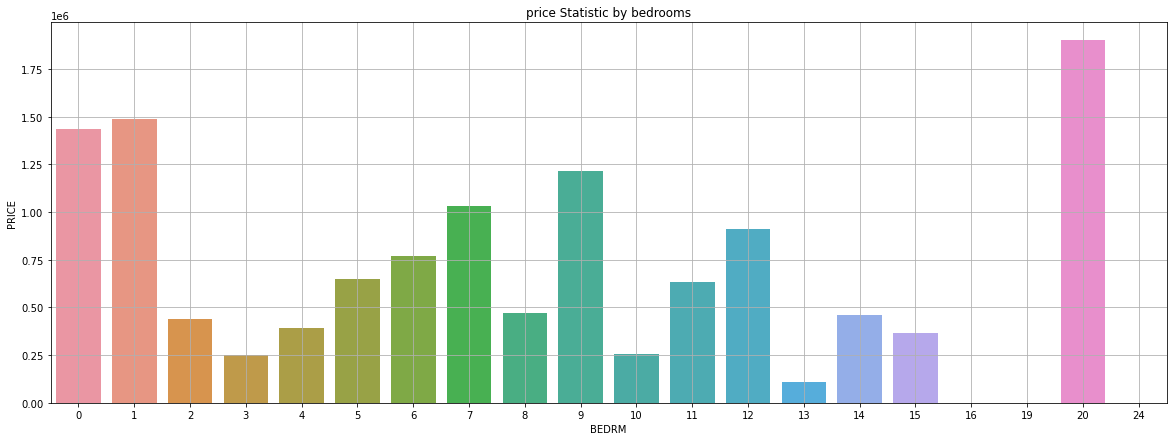

In [47]:
plt.figure(figsize=(20,7))


sns.barplot(data = df, x = "BEDRM", y = "PRICE", ci = None)

plt.title('price Statistic by bedrooms')
plt.grid()

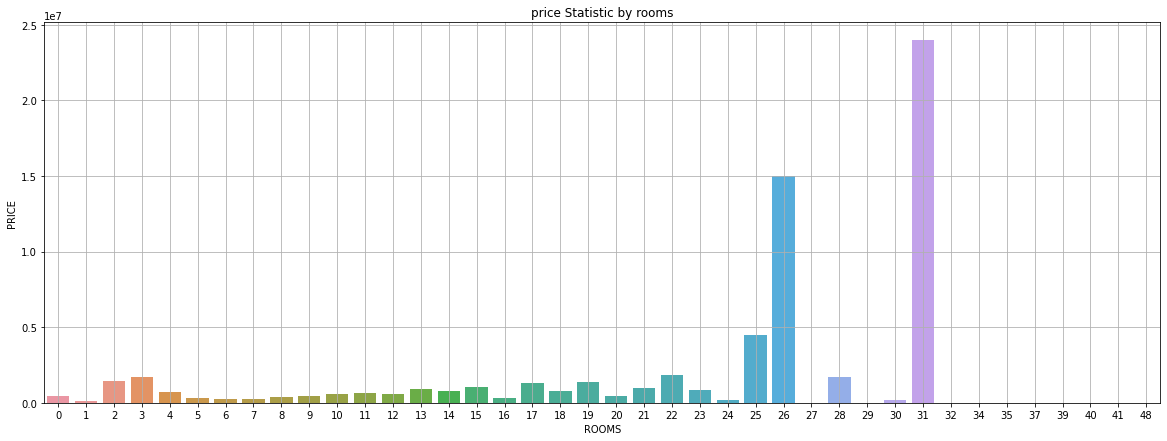

In [49]:
plt.figure(figsize=(20,7))


sns.barplot(data = df, x = "ROOMS", y = "PRICE", ci = None)

plt.title('price Statistic by rooms')
plt.grid()

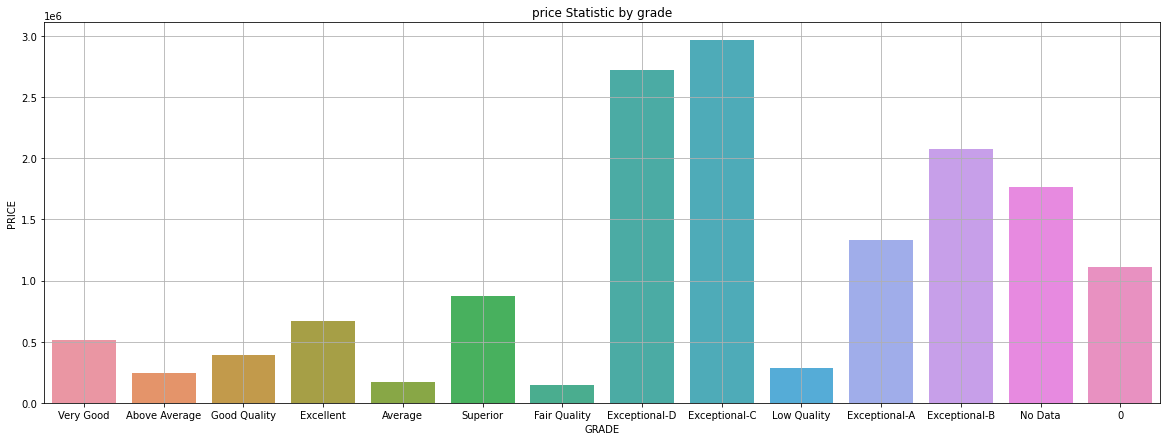

In [50]:
plt.figure(figsize=(20,7))


sns.barplot(data = df, x = "GRADE", y = "PRICE", ci = None)

plt.title('price Statistic by grade')
plt.grid()

Text(0.5, 1.0, 'price Statistic by stories and qualified')

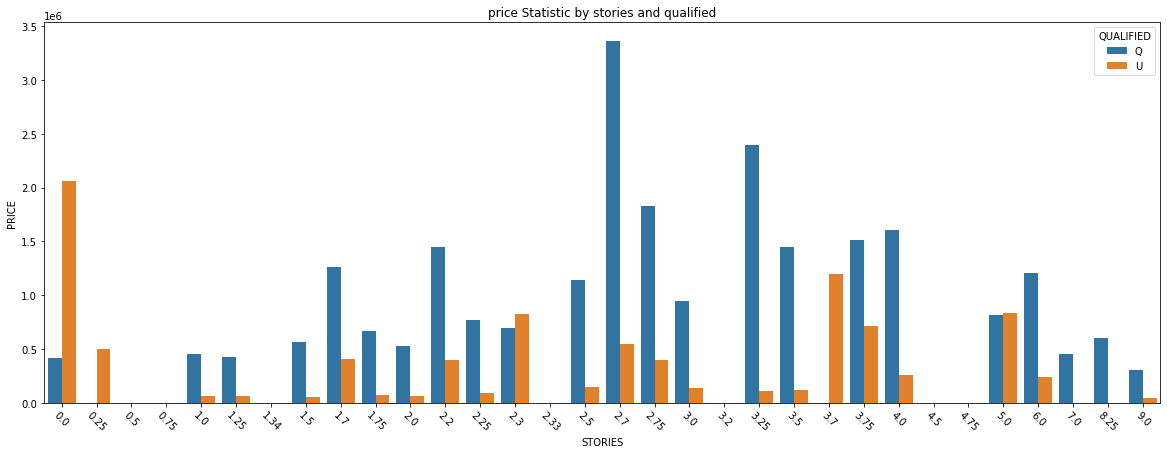

In [51]:
plt.figure(figsize=(20,7))

sns.barplot(data = df, x = "STORIES", y = "PRICE", hue = "QUALIFIED", ci = None)

plt.xticks(rotation = -45)
plt.title('price Statistic by stories and qualified')